In [2]:
#Section 4.4.1 The t Distribution
""""For a particular df value, we denote the t quantile having probability a in the right-tail
(and so is the 1 − a quantile) by ta,df . The t quantile scores are supplied by software and by
Internet apps.9 The R function qt gives t quantiles; pt gives t cumulative probabilities. For
95% confidence intervals, we use t quantile scores having right-tail probability of 0.025 and
cumulative probability of 0.975. Here they are when df = 1, 10, 30, 100, 1000, 10000:"""
#We use the t distribution in the construction of a CI for the mean of a normal population.
import numpy as np
df = np.array([1, 10, 30, 100, 1000, 10000])
from scipy.stats import t
arr=t.ppf(0.975, df) # 0.975-quantiles for specified df values
print(arr)
t.cdf(1.96020124, 10000)
# cumulative probability at t=1.96020124 when df=10000

[12.70620474  2.22813885  2.04227246  1.98397152  1.96233908  1.96020124]


0.9750000000063903

   subject therapy  before  after
0        1      cb    80.5   82.2
1        2      cb    84.9   85.6
2        3      cb    81.5   81.4
   subject therapy  before  after  change
0        1      cb    80.5   82.2     1.7
1        2      cb    84.9   85.6     0.7
2        3      cb    81.5   81.4    -0.1


(-0.7432794440477513, 6.757072547496028)

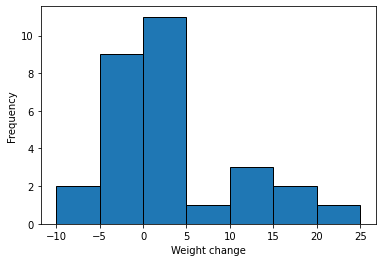

In [2]:
""""An experimental study compared three therapies for young girls suffering from anorexia,
an eating disorder. For each girl, weight was measured before and after a fixed period of
treatment designed to aid weight gain. For the 29 girls undergoing the cognitive behavioral
(cb) therapy, the weights at the end of the study minus the weights at the beginning (in
pounds) were11
1.7, 0.7, −0.1, −0.7, −3.5, 14.9, 3.5, 17.1, −7.6, 1.6, 11.7, 6.1, 1.1, −4.0, 20.9,
−9.3, 2.1, 1.4, −0.3, −3.7, −1.4, −0.8, 2.4, 12.6, 1.9, 3.9, 0.1, 15.4, −0.7
Let µ denote the population mean change in weight, if this therapy could be administered
to the conceptual population of anorexia sufferers.
Using R to analyze the data, we obtain results for descriptive and inferential statistics"""
#4.3 Confidence Intervals for Means
#We next find descriptive statistics and CIs for the Section 4.4.3 example of analyzing weight
#changes of anorexic girls who are undergoing a cognitive behavioral therapy:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Anor = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep='\s+')
print(Anor.head(3))
change = Anor['after'] - Anor['before']
Anor['change'] = change # add new variable to the data frame
print(Anor.head(3))
Anor.loc[Anor['therapy'] == 'cb']['change'].describe()
# showing only n and mean and standard deviation of change
bins=list(range(-10,30,5)) 

# histogram with pre-specified bins:
plt.hist(Anor.loc[Anor['therapy']=='cb']['change'],bins, edgecolor='k')
plt.xlabel('Weight change'); plt.ylabel('Frequency')
changeCB = Anor.loc[Anor['therapy'] == 'cb']['change']
import statsmodels.stats.api as sms
sms.DescrStatsW(changeCB).tconfint_mean() # default alpha=0.05# 95% CI for mean change
sms.DescrStatsW(changeCB).tconfint_mean(alpha=0.01)


In [5]:
#Section 4.5.3 Example: Comparing a Therapy to a Control Group;
#Section 4.5.4 Confidence Interval Comparing Two Proportions; 
#Appendix B,Section B.4.4 Confidence Intervals Comparing Means and Comparing Proportions.
""""The study described in Section 4.4.3 used a cognitive behavioral therapy to treat a sample
of teenage girls who suffered from anorexia. The study, like most such studies, also had a
control group that received no treatment. Then researchers analyzed how the mean weight
change compared for the treatment and control groups. The girls in the study were randomly
assigned to the cognitive behavioral therapy (Group 1) or to the control group (Group 2).
Table 4.1 summarizes the results."""
#Summary of results comparing treatment group to control group for weight change (in pounds) in anorexia study.
#Group     SampleSize   Mean Standard Deviation
#Treatment 29          3.01   7.31
#Control   26         −0.45   7.99

#To construct these CIs, assuming equal or unequal population variances for the two groups
import numpy as np
from scipy.stats import t
Anor = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep='\s+')
change = Anor['after'] - Anor['before']
Anor['change'] = change
def t2ind_confint(y1, y2, equal_var = True, alpha = 0.05):
# y1, y2: vectors or data frames of values for groups A and B
    n1 = len(y1); n2 = len(y2);
    v1 = np.var(y1)*n1/(n1-1); 
    v2 = np.var(y2)*n2/(n2-1);
    if equal_var:
        df = n1 + n2 - 2
        vardiff = ((n1-1)*v1+(n2-1)*v2)/(n1+n2-2)*(1/n1 + 1/n2)
    else:
        df = (v1/n1 + v2/n2)**2/(v1**2/(n1**2*(n1-1)) + v2**2/(n2**2*(n2-1)))
        vardiff = v1/n1 + v2/n2
    se = np.sqrt(vardiff)
    qt = t.ppf(1 - alpha/2, df) # t quantile for 100(1-alpha)% CI
    mean_diff = np.mean(y1) - np.mean(y2)
    confint = mean_diff + np.array([-1, 1]) * qt * se
    conf = 1 - alpha
    return mean_diff, confint, conf, df
#we implement this function to find a 95% CI for the difference between the weight
#changes for the cognitive behavioral therapy and the control groups in the anorexia study:
cogbehav = Anor.loc[Anor['therapy']=='cb']['change']
control = Anor.loc[Anor['therapy']=='c']['change']
mean_diff, confint, conf, df = t2ind_confint(cogbehav,control)
print('mean1 - mean2 =', mean_diff) # assume equal variances
print(conf, 'confidence interval:', confint)
print('df =', df)
df = 53
mean_diff, confint, conf, df = t2ind_confint(cogbehav,control, equal_var=False)
print('mean1 - mean2 =', mean_diff)
print(conf, 'confidence interval:', confint)
print('df =', df)

mean1 - mean2 = 3.456896551724137
0.95 confidence interval: [-0.68013704  7.59393014]
df = 53
mean1 - mean2 = 3.456896551724137
0.95 confidence interval: [-0.70446319  7.61825629]
df = 50.97065330426787


In [3]:
#Section 4.7 The Bayesian Approach to Statistical Inference (See subsection 4.7.3);
#Appendix B, Section B.4.6 Bayesian Posterior Intervals for Proportions and Means.
""""The 2018 General Social Survey (GSS) in the U.S. asked “Do you believe in hell?” Of the
1142 respondents, 814 said yes and 328 said no. The ML estimate of π is πˆ = 814/1142 =
0.713, and you can check that the 95% score confidence interval (4.7) is (0.686, 0.738). How
does this compare to a Bayesian estimate and posterior interval?"""
from statsmodels.stats.proportion import proportion_confint
proportion_confint(814, 1142, method='jeffreys')
 # 95% Jeffreys posterior interval
import pymc3 as pm
from scipy.stats import beta
beta_dist = beta.rvs(size = 5000000, a = 814.5, b = 328.5)
print(pm.stats.hpd(beta_dist, alpha=0.05))
# 95% HPD interval when use Jeffreys prior
import numpy as np
print('[',np.quantile(beta_dist, 0.025),',', np.quantile(beta_dist, 0.975),']')


AttributeError: module 'pymc3.stats' has no attribute 'hpd'